In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.shape
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

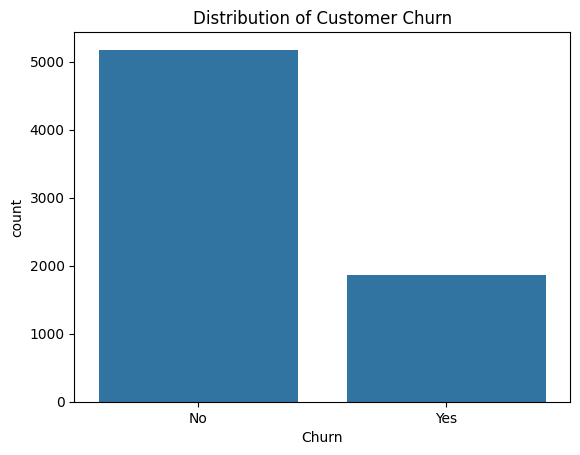

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
plt.show()


In [14]:
df['Churn'].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [18]:
## As it can be seen, the distribution of the target variable is unbalanced and the number of customers who have not left the service is significantly higher. This imbalance makes the Accuracy metric alone misleading; therefore, metrics such as F1-score will be used in the rest of the project.

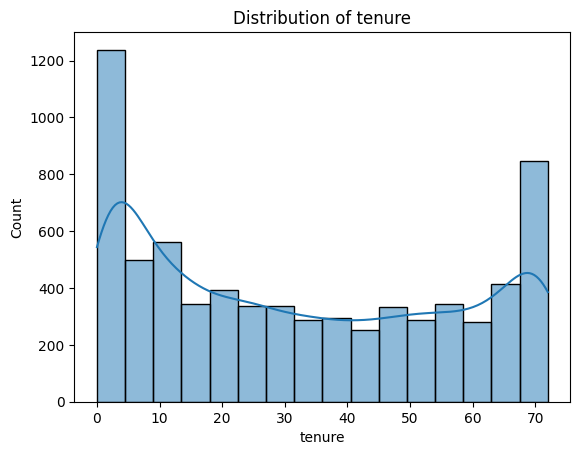

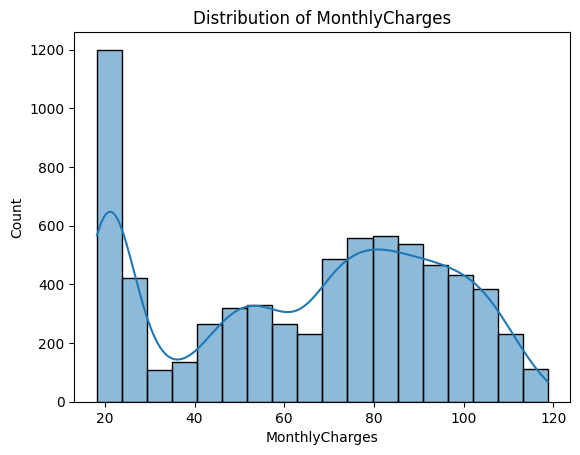

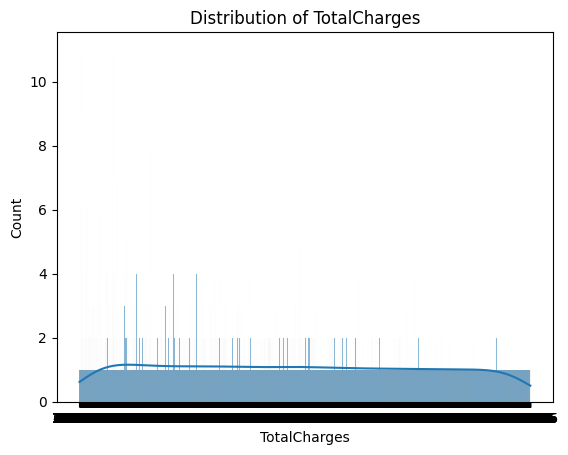

In [24]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_features:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [20]:
## The enterprise characteristic has a right-skewed distribution, indicating that it pays significant attention to new customers

In [25]:
## To be mentioned, Monthly Charges has high dispersion, which can be important information for predicting churn.

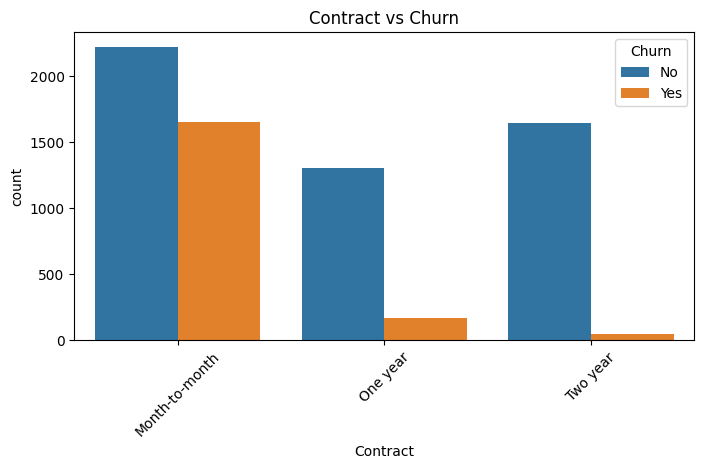

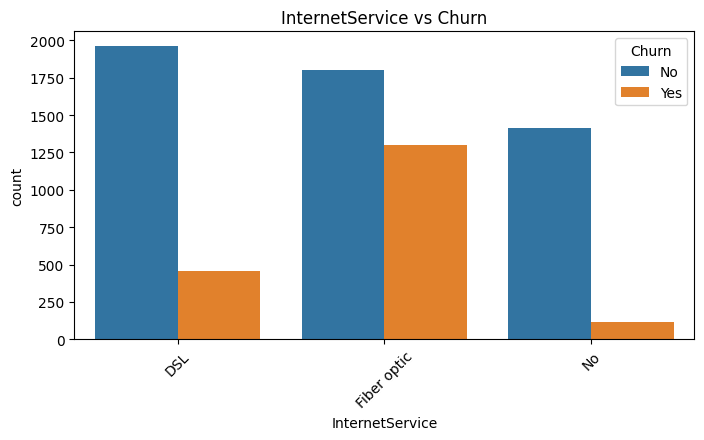

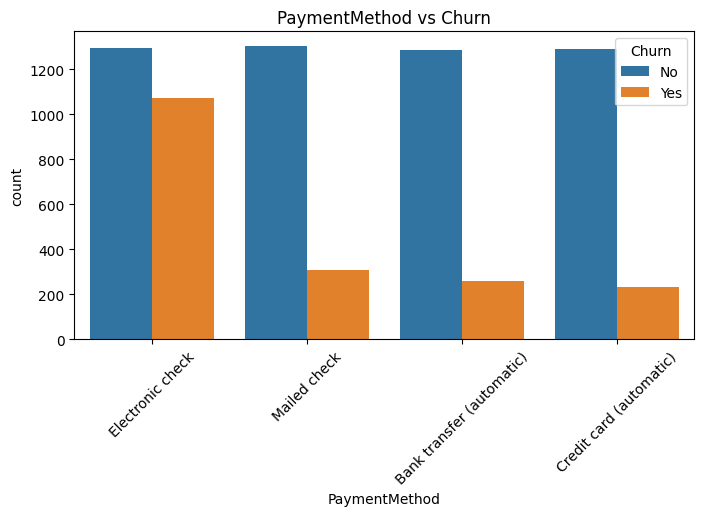

In [26]:
cat_features = ['Contract', 'InternetService', 'PaymentMethod']

for col in cat_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.show()


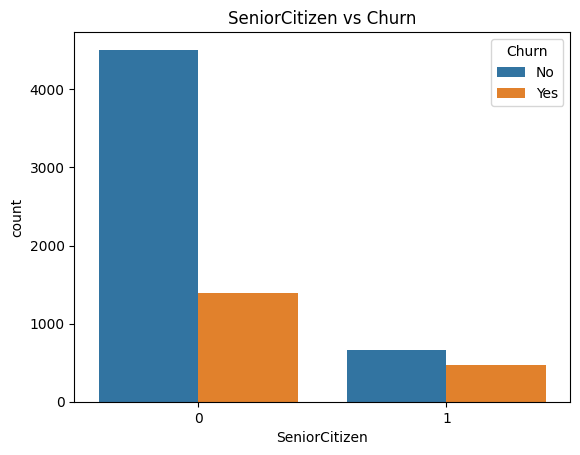

In [27]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('SeniorCitizen vs Churn')
plt.show()

In [28]:
## Contract
## Customers on monthly contracts have a much higher churn rate than those on long-term contracts.

In [30]:
## PaymentMethod
## Electronic payment is associated with higher churn, which could be an indication of riskier customer behavior.

In [31]:
## InternetService
## Type of Internet service has a significant relationship with the likelihood of churn.

IndexError: index 0 is out of bounds for axis 0 with size 0

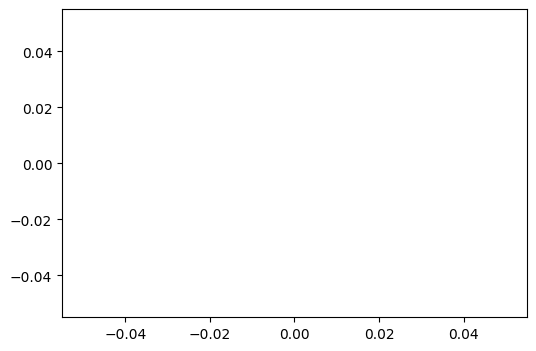

In [40]:
missing = df.isnull().mean() * 100
missing = missing[missing > 0]

plt.figure(figsize=(6,4))
missing.sort_values().plot(kind='barh')
plt.title('Percentage of Missing Values per Feature')
plt.xlabel('Percentage')
plt.show()

In [36]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges          str
dtype: object

In [38]:
df['TotalCharges'].unique()[:10]

<StringArray>
[  '29.85',  '1889.5',  '108.15', '1840.75',  '151.65',   '820.5',  '1949.4',
   '301.9', '3046.05', '3487.95']
Length: 10, dtype: str

In [39]:
## Initial inspection revealed that the TotalCharges column was stored as a string and contained empty values. Therefore, this attribute was converted to a numeric type during preprocessing and invalid values were handled.

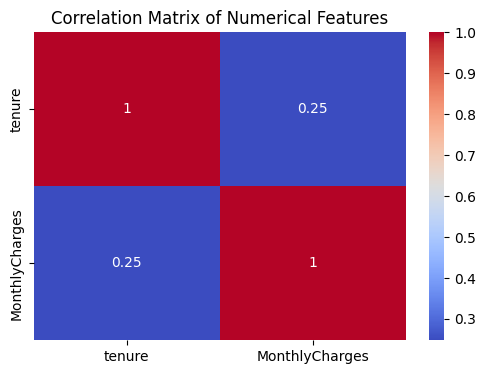

In [33]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['tenure', 'MonthlyCharges']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [34]:
## In this dataset, a small amount of missing data is observed, mainly related to the TotalCharges feature. Since this feature is of high importance, an appropriate strategy for its replacement will be considered in the preprocessing stage

In [35]:
## During the EDA phase, it was determined that the TotalCharges property, despite being numerical in nature, contained non-numeric values that required correction before modeling.